In [95]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'Times New Roman'})
import seaborn as sns
import pandas as pd
import numpy as np
import cleantext
import re
from langdetect import detect
import statsmodels.api as sm
import statsmodels as sms
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2

In [96]:
dframe_tech_skills = pd.read_excel('glossary_tech_manually_reviewed.xlsx', sheet_name='glossary_tech_processed_final')
dframe_tech_skills['skill_pt_processed_len'] = dframe_tech_skills['skill_pt_processed'].apply(lambda x: len(x.strip()))
dframe_tech_skills['skill_pt_processed'] = dframe_tech_skills['skill_pt_processed'].apply(lambda x: x.strip())

In [97]:
dframe_jobs = pd.read_excel('combined_accounting_processed.xlsx', sheet_name='no_duplicates_with_salary')
#removendo a pontuação
dframe_jobs['descricao_completa_vaga_cleansed'] = dframe_jobs['descricao_completa_vaga'].map(lambda x: re.sub('[-,\;.!?]', '', x))
#convertendo para letras minusculas
dframe_jobs['descricao_completa_vaga_cleansed'] = dframe_jobs['descricao_completa_vaga_cleansed'].map(lambda x: x.lower())
#removendo espaços do inicio e do final
dframe_jobs['descricao_completa_vaga_cleansed'] = dframe_jobs['descricao_completa_vaga_cleansed'].map(lambda x: x.strip())
#removendo quebras de linhas
dframe_jobs['descricao_completa_vaga_cleansed'] = dframe_jobs['descricao_completa_vaga_cleansed'].map(lambda x: x.replace('\n',' '))
#removendo contra barras de linhas
dframe_jobs['descricao_completa_vaga_cleansed'] = dframe_jobs['descricao_completa_vaga_cleansed'].map(lambda x: x.replace('/',' '))


In [98]:
bag_of_words_back_end_tech_python = dframe_tech_skills.query("category_en=='Back-end Technologies Python'")['skill_pt_processed'].str.strip().to_list()
bag_of_words_data_science = dframe_tech_skills.query("category_en=='Data Science'")['skill_pt_processed'].str.strip().to_list()
bag_of_words_databases = dframe_tech_skills.query("category_en=='Databases'")['skill_pt_processed'].str.strip().to_list()
bag_of_words_dev_metho = dframe_tech_skills.query("category_en=='Development Methodologies'")['skill_pt_processed'].str.strip().to_list()
bag_of_words_proj_manag = dframe_tech_skills.query("category_en=='Project Management'")['skill_pt_processed'].str.strip().to_list()
bag_of_words_tools = dframe_tech_skills.query("category_en=='Tools'")['skill_pt_processed'].str.strip().to_list()
bag_of_words_languages = ['inglês','espanhol']

In [99]:
dframe_jobs['techskill_back_end_python'] = dframe_jobs['descricao_completa_vaga_cleansed'].apply(lambda x: any([k in x for k in bag_of_words_back_end_tech_python]))
dframe_jobs['techskill_back_end_python_qty'] = dframe_jobs.descricao_completa_vaga_cleansed.str.count(r"\b{}\b".format("|".join(bag_of_words_back_end_tech_python)))
dframe_jobs['techskill_back_end_python_analytic'] = dframe_jobs['descricao_completa_vaga_cleansed'].apply(lambda x: re.findall(r"(?=("+'|'.join(bag_of_words_back_end_tech_python)+r"))", x))
dframe_jobs['techskill_back_end_python_analytic'] = dframe_jobs['techskill_back_end_python_analytic'].apply(lambda x: list(set(x)))
dframe_jobs['techskill_back_end_python_qty'] = dframe_jobs['techskill_back_end_python_analytic'].apply(lambda x: len(list(set(x))))

dframe_jobs['techskill_data_science'] = dframe_jobs['descricao_completa_vaga_cleansed'].apply(lambda x: any([k in x for k in bag_of_words_data_science]))
dframe_jobs['techskill_data_science_qty'] = dframe_jobs.descricao_completa_vaga_cleansed.str.count(r'\b{}\b'.format('|'.join(bag_of_words_data_science)))
dframe_jobs['techskill_data_science_analytic'] = dframe_jobs['descricao_completa_vaga_cleansed'].apply(lambda x: re.findall(r"(?=("+'|'.join(bag_of_words_data_science)+r"))", x))
dframe_jobs['techskill_data_science_analytic'] = dframe_jobs['techskill_data_science_analytic'].apply(lambda x: list(set(x)))
dframe_jobs['techskill_data_science_qty'] = dframe_jobs['techskill_data_science_analytic'].apply(lambda x: len(list(set(x))))

dframe_jobs['techskill_databases'] = dframe_jobs['descricao_completa_vaga_cleansed'].apply(lambda x: any([k in x for k in bag_of_words_databases]))
dframe_jobs['techskill_databases_qty'] = dframe_jobs.descricao_completa_vaga_cleansed.str.count(r'\b{}\b'.format('|'.join(bag_of_words_databases)))
dframe_jobs['techskill_databases_analytic'] = dframe_jobs['descricao_completa_vaga_cleansed'].apply(lambda x: re.findall(r"(?=("+'|'.join(bag_of_words_databases)+r"))", x))
dframe_jobs['techskill_databases_analytic'] = dframe_jobs['techskill_databases_analytic'].apply(lambda x: list(set(x)))
dframe_jobs['techskill_databases_qty'] = dframe_jobs['techskill_databases_analytic'].apply(lambda x: len(list(set(x))))

dframe_jobs['techskill_devmetho'] = dframe_jobs['descricao_completa_vaga_cleansed'].apply(lambda x: any([k in x for k in bag_of_words_dev_metho]))
dframe_jobs['techskill_devmetho_qty'] =  dframe_jobs.descricao_completa_vaga_cleansed.str.count(r'\b{}\b'.format('|'.join(bag_of_words_dev_metho)))
dframe_jobs['techskill_devmetho_analytic'] = dframe_jobs['descricao_completa_vaga_cleansed'].apply(lambda x: re.findall(r"(?=("+'|'.join(bag_of_words_dev_metho)+r"))", x))
dframe_jobs['techskill_devmetho_analytic'] = dframe_jobs['techskill_devmetho_analytic'].apply(lambda x: list(set(x)))
dframe_jobs['techskill_devmetho_qty'] = dframe_jobs['techskill_devmetho_analytic'].apply(lambda x: len(list(set(x))))

dframe_jobs['techskill_proj_manag'] = dframe_jobs['descricao_completa_vaga_cleansed'].apply(lambda x: any([k in x for k in bag_of_words_proj_manag]))
dframe_jobs['techskill_proj_manag_qty'] = dframe_jobs.descricao_completa_vaga_cleansed.str.count(r'\b{}\b'.format('|'.join(bag_of_words_proj_manag)))
dframe_jobs['techskill_proj_manag_analytic'] = dframe_jobs['descricao_completa_vaga_cleansed'].apply(lambda x: re.findall(r"(?=("+'|'.join(bag_of_words_proj_manag)+r"))", x))
dframe_jobs['techskill_proj_manag_analytic'] = dframe_jobs['techskill_proj_manag_analytic'].apply(lambda x: list(set(x)))
dframe_jobs['techskill_proj_manag_qty'] = dframe_jobs['techskill_proj_manag_analytic'].apply(lambda x: len(list(set(x))))

dframe_jobs['techskill_tools'] = dframe_jobs['descricao_completa_vaga_cleansed'].apply(lambda x: any([k in x for k in bag_of_words_tools]))
dframe_jobs['techskill_tools_qty'] = dframe_jobs.descricao_completa_vaga_cleansed.str.count(r'\b{}\b'.format('|'.join(bag_of_words_tools)))
dframe_jobs['techskill_tools_analytic'] = dframe_jobs['descricao_completa_vaga_cleansed'].apply(lambda x: re.findall(r"(?=("+'|'.join(bag_of_words_tools)+r"))", x))
dframe_jobs['techskill_tools_analytic'] = dframe_jobs['techskill_tools_analytic'].apply(lambda x: list(set(x))) 
dframe_jobs['techskill_tools_qty'] = dframe_jobs['techskill_tools_analytic'].apply(lambda x: len(list(set(x))))

dframe_jobs['languages'] = dframe_jobs['descricao_completa_vaga_cleansed'].apply(lambda x: any([k in x for k in bag_of_words_languages]))
dframe_jobs['languages_qty'] = dframe_jobs.descricao_completa_vaga_cleansed.str.count(r'\b{}\b'.format('|'.join(bag_of_words_languages)))
dframe_jobs['languages_analytic'] = dframe_jobs['descricao_completa_vaga_cleansed'].apply(lambda x: re.findall(r"(?=("+'|'.join(bag_of_words_languages)+r"))", x))
dframe_jobs['languages_analytic'] = dframe_jobs['languages_analytic'].apply(lambda x: list(set(x))) 
dframe_jobs['languages_qty'] = dframe_jobs['languages_analytic'].apply(lambda x: len(list(set(x))))

In [100]:
dframe_jobs.groupby(['techskill_back_end_python'])['titulo_vaga'].count()

techskill_back_end_python
False    4505
True        4
Name: titulo_vaga, dtype: int64

In [101]:
dframe_jobs.groupby(['techskill_data_science'])['titulo_vaga'].count()

techskill_data_science
False    2326
True     2183
Name: titulo_vaga, dtype: int64

In [102]:
dframe_jobs.groupby(['techskill_databases'])['titulo_vaga'].count()

techskill_databases
False    4441
True       68
Name: titulo_vaga, dtype: int64

In [103]:
dframe_jobs.groupby(['techskill_devmetho'])['titulo_vaga'].count()

techskill_devmetho
False    4502
True        7
Name: titulo_vaga, dtype: int64

In [104]:
dframe_jobs.groupby(['techskill_proj_manag'])['titulo_vaga'].count()

techskill_proj_manag
False    4275
True      234
Name: titulo_vaga, dtype: int64

In [105]:
dframe_jobs.groupby(['techskill_tools'])['titulo_vaga'].count()

techskill_tools
False    4472
True       37
Name: titulo_vaga, dtype: int64

In [106]:
dframe_jobs.groupby(['languages'])['titulo_vaga'].count()

languages
False    4192
True      317
Name: titulo_vaga, dtype: int64

In [107]:
dframe_jobs.loc[0].to_dict()

{'titulo_vaga': 'Coordenador Contábil - Contabilidade',
 'titulo_vaga_processed': 'coordenador contábil - contabilidade',
 'titulo_vaga_processed_categoria': '05 - coordenador/supervisor',
 'contem_cont': 1,
 'é_gestão?': 1,
 'salario_vaga': 'De R$ 4.001,00 a R$ 5.000,00',
 'salario_vaga_tier_final': '05 - De R$ 4.001,00 a R$ 5.000,00',
 'salario_vaga_processed_avg': 4500.5,
 'salario_vaga_processed_tier2': 5000,
 'salario_vaga_processed_tier1': 4001,
 'localidade_vaga': 'São Paulo - SP (1)',
 'cidade_processed': 'São Paulo',
 'estado_processed': 'SP',
 'localidade_processed': 'São Paulo - SP',
 'descricao_completa_vaga': 'Liderar, planejar, trabalhar e supervisionar as atividades realizadas pela equipe contábil, visando assegurar que todos os lançamentos e registros sejam feitos de acordo com os princípios e normas contábeis e legislação pertinente, dentro dos prazos e procedimentos estabelecidos pela empresa / legislação. Orientar no processo de fechamento contábil, na elaboração de 

In [108]:
dframe_jobs['qty_total_tech_skills'] = dframe_jobs['techskill_back_end_python_qty'] + dframe_jobs['techskill_data_science_qty'] + dframe_jobs['techskill_databases_qty'] + dframe_jobs['techskill_devmetho_qty'] + dframe_jobs['techskill_proj_manag_qty'] + dframe_jobs['techskill_tools_qty']

In [109]:
dframe_jobs.corr()

,contem_cont,é_gestão?,salario_vaga_processed_avg,salario_vaga_processed_tier2,salario_vaga_processed_tier1,techskill_back_end_python,techskill_back_end_python_qty,techskill_data_science,techskill_data_science_qty,techskill_databases,techskill_databases_qty,techskill_devmetho,techskill_devmetho_qty,techskill_proj_manag,techskill_proj_manag_qty,techskill_tools,techskill_tools_qty,languages,languages_qty,qty_total_tech_skills
contem_cont,1.000000,-0.056531,0.034230,0.030470,0.038177,-0.021875,-0.021875,-0.001360,-0.000870,-0.064136,-0.061705,-0.028947,-0.027350,-0.008267,-0.009426,-0.035853,-0.036599,0.025441,0.015184,-0.023320
é_gestão?,-0.056531,1.000000,0.550374,0.539898,0.555981,0.040408,0.040408,0.037353,0.030136,0.020631,0.012379,0.006016,0.000303,0.024143,0.029967,-0.005058,-0.006191,0.058659,0.056972,0.037473
salario_vaga_processed_avg,0.034230,0.550374,1.000000,0.995258,0.993635,0.067684,0.067684,0.139514,0.162253,0.116052,0.101817,0.047123,0.044816,0.146840,0.160534,0.017014,0.016768,0.184120,0.176672,0.212523
salario_vaga_processed_tier2,0.030470,0.539898,0.995258,1.000000,0.977966,0.070620,0.070620,0.134830,0.158265,0.114019,0.099006,0.041255,0.040060,0.143536,0.157845,0.014923,0.014808,0.179228,0.171942,0.207307
salario_vaga_processed_tier1,0.038177,0.555981,0.993635,0.977966,1.000000,0.063481,0.063481,0.143283,0.164948,0.117031,0.103866,0.053361,0.049793,0.148925,0.161744,0.019234,0.018839,0.187602,0.180054,0.216043
techskill_back_end_python,-0.021875,0.040408,0.067684,0.070620,0.063481,1.000000,1.000000,0.030758,0.137027,0.240807,0.323278,-0.001175,-0.001110,0.026612,0.024995,0.079865,0.150519,0.020944,0.017755,0.245461
techskill_back_end_python_qty,-0.021875,0.040408,0.067684,0.070620,0.063481,1.000000,1.000000,0.030758,0.137027,0.240807,0.323278,-0.001175,-0.001110,0.026612,0.024995,0.079865,0.150519,0.020944,0.017755,0.245461
techskill_data_science,-0.001360,0.037353,0.139514,0.134830,0.143283,0.030758,0.030758,1.000000,0.869026,0.025774,0.027869,-0.004385,0.001182,0.103455,0.102078,0.000427,0.005103,0.092914,0.090161,0.782692
techskill_data_science_qty,-0.000870,0.030136,0.162253,0.158265,0.164948,0.137027,0.137027,0.869026,1.000000,0.076501,0.084399,-0.010212,-0.006029,0.106285,0.103367,0.010357,0.024373,0.128349,0.126938,0.913089
techskill_databases,-0.064136,0.020631,0.116052,0.114019,0.117031,0.240807,0.240807,0.025774,0.076501,1.000000,0.903671,0.041341,0.056529,0.094105,0.088247,0.029087,0.045120,0.030032,0.029869,0.300162


In [110]:
dframe_jobs_cont = dframe_jobs.query("contem_cont==1")

In [111]:
dframe_jobs_cont.columns

Index(['titulo_vaga', 'titulo_vaga_processed',
       'titulo_vaga_processed_categoria', 'contem_cont', 'é_gestão?',
       'salario_vaga', 'salario_vaga_tier_final', 'salario_vaga_processed_avg',
       'salario_vaga_processed_tier2', 'salario_vaga_processed_tier1',
       'localidade_vaga', 'cidade_processed', 'estado_processed',
       'localidade_processed', 'descricao_completa_vaga',
       'descricao_completa_vaga_cleansed', 'techskill_back_end_python',
       'techskill_back_end_python_qty', 'techskill_back_end_python_analytic',
       'techskill_data_science', 'techskill_data_science_qty',
       'techskill_data_science_analytic', 'techskill_databases',
       'techskill_databases_qty', 'techskill_databases_analytic',
       'techskill_devmetho', 'techskill_devmetho_qty',
       'techskill_devmetho_analytic', 'techskill_proj_manag',
       'techskill_proj_manag_qty', 'techskill_proj_manag_analytic',
       'techskill_tools', 'techskill_tools_qty', 'techskill_tools_analytic',
  

In [112]:
X = np.column_stack((dframe_jobs_cont['é_gestão?'], ##x1
                    dframe_jobs_cont['techskill_data_science_qty'], ##x2
                    dframe_jobs_cont['techskill_databases_qty'], ##x3
                    dframe_jobs_cont['techskill_proj_manag_qty'], ##x4
                    dframe_jobs_cont['languages_qty'] ##x5
                    ))
y = dframe_jobs_cont['salario_vaga_processed_avg']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                OLS Regression Results                                
Dep. Variable:     salario_vaga_processed_avg   R-squared:                       0.367
Model:                                    OLS   Adj. R-squared:                  0.365
Method:                         Least Squares   F-statistic:                     182.8
Date:                        Sun, 15 Aug 2021   Prob (F-statistic):          1.30e-153
Time:                                17:09:11   Log-Likelihood:                -13837.
No. Observations:                        1579   AIC:                         2.769e+04
Df Residuals:                            1573   BIC:                         2.772e+04
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [113]:
X = np.column_stack((dframe_jobs_cont['é_gestão?'], 
                    dframe_jobs_cont['techskill_data_science'], 
                    dframe_jobs_cont['techskill_databases'],
                    dframe_jobs_cont['techskill_proj_manag'],
                    dframe_jobs_cont['languages']
                    ))
y = dframe_jobs_cont['salario_vaga_processed_avg']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                OLS Regression Results                                
Dep. Variable:     salario_vaga_processed_avg   R-squared:                       0.364
Model:                                    OLS   Adj. R-squared:                  0.362
Method:                         Least Squares   F-statistic:                     180.0
Date:                        Sun, 15 Aug 2021   Prob (F-statistic):          1.02e-151
Time:                                17:09:12   Log-Likelihood:                -13841.
No. Observations:                        1579   AIC:                         2.769e+04
Df Residuals:                            1573   BIC:                         2.773e+04
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

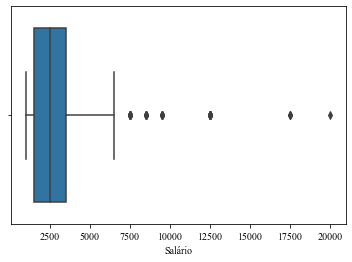

In [114]:
sns.boxplot(data=dframe_jobs_cont,x='salario_vaga_processed_avg')
plt.xlabel("Salário")
plt.savefig("Figura 3_salario_boxplot.png")

In [115]:
dframe_jobs_cont_no_outliers = dframe_jobs_cont.query("salario_vaga_processed_avg<7500")

In [116]:
dframe_jobs_cont_no_outliers.columns

Index(['titulo_vaga', 'titulo_vaga_processed',
       'titulo_vaga_processed_categoria', 'contem_cont', 'é_gestão?',
       'salario_vaga', 'salario_vaga_tier_final', 'salario_vaga_processed_avg',
       'salario_vaga_processed_tier2', 'salario_vaga_processed_tier1',
       'localidade_vaga', 'cidade_processed', 'estado_processed',
       'localidade_processed', 'descricao_completa_vaga',
       'descricao_completa_vaga_cleansed', 'techskill_back_end_python',
       'techskill_back_end_python_qty', 'techskill_back_end_python_analytic',
       'techskill_data_science', 'techskill_data_science_qty',
       'techskill_data_science_analytic', 'techskill_databases',
       'techskill_databases_qty', 'techskill_databases_analytic',
       'techskill_devmetho', 'techskill_devmetho_qty',
       'techskill_devmetho_analytic', 'techskill_proj_manag',
       'techskill_proj_manag_qty', 'techskill_proj_manag_analytic',
       'techskill_tools', 'techskill_tools_qty', 'techskill_tools_analytic',
  

In [117]:
X = np.column_stack((dframe_jobs_cont_no_outliers['é_gestão?'], 
                    dframe_jobs_cont_no_outliers['techskill_data_science_qty'], 
                    dframe_jobs_cont_no_outliers['techskill_databases_qty'],
                    dframe_jobs_cont_no_outliers['techskill_proj_manag_qty'],
                    dframe_jobs_cont_no_outliers['languages_qty']
                    ))
y = dframe_jobs_cont_no_outliers['salario_vaga_processed_avg']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                OLS Regression Results                                
Dep. Variable:     salario_vaga_processed_avg   R-squared:                       0.233
Model:                                    OLS   Adj. R-squared:                  0.231
Method:                         Least Squares   F-statistic:                     92.81
Date:                        Sun, 15 Aug 2021   Prob (F-statistic):           1.93e-85
Time:                                17:09:12   Log-Likelihood:                -12877.
No. Observations:                        1530   AIC:                         2.577e+04
Df Residuals:                            1524   BIC:                         2.580e+04
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [118]:
X = np.column_stack((dframe_jobs_cont_no_outliers['é_gestão?'], 
                    dframe_jobs_cont_no_outliers['techskill_data_science_qty'],
                    dframe_jobs_cont_no_outliers['techskill_proj_manag_qty'],
                    dframe_jobs_cont_no_outliers['languages_qty']
                    ))
y = dframe_jobs_cont_no_outliers['salario_vaga_processed_avg']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                OLS Regression Results                                
Dep. Variable:     salario_vaga_processed_avg   R-squared:                       0.233
Model:                                    OLS   Adj. R-squared:                  0.231
Method:                         Least Squares   F-statistic:                     116.0
Date:                        Sun, 15 Aug 2021   Prob (F-statistic):           2.03e-86
Time:                                17:09:13   Log-Likelihood:                -12877.
No. Observations:                        1530   AIC:                         2.576e+04
Df Residuals:                            1525   BIC:                         2.579e+04
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [119]:
dframe_jobs_by_estado = dframe_jobs_cont.groupby(by=['estado_processed'], as_index=False)['titulo_vaga'].count().rename(columns={"estado_processed":"estado",
                                                                                                         "titulo_vaga":"qtd_vagas"}).sort_values(by=['qtd_vagas'],ascending=True)

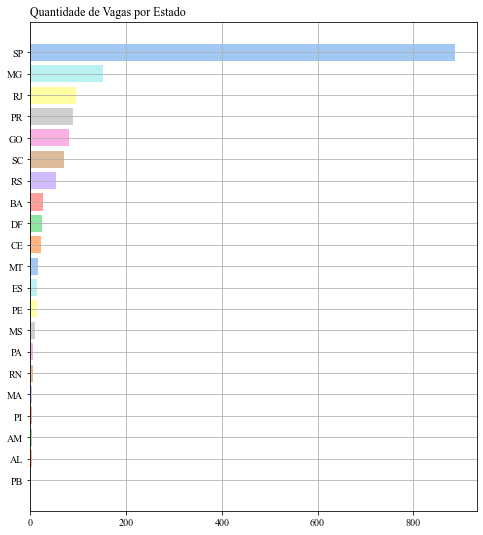

In [155]:
from matplotlib.pyplot import figure
colors = sns.color_palette('pastel')
plt.rcParams["figure.figsize"] = (8, 9)
fig = plt.barh(dframe_jobs_by_estado['estado'], dframe_jobs_by_estado['qtd_vagas'], color=colors)
plt.title('Quantidade de Vagas por Estado', loc='left')
plt.grid()
plt.show()

In [121]:
dframe_jobs_by_cidade = dframe_jobs_cont.groupby(by=['localidade_processed'], as_index=False)['titulo_vaga'].count().rename(columns={"localidade_processed":"cidade",
                                                                                                         "titulo_vaga":"qtd_vagas"}).sort_values(by=['qtd_vagas'],ascending=True)
dframe_jobs_by_cidade_top10 = dframe_jobs_by_cidade.tail(10)

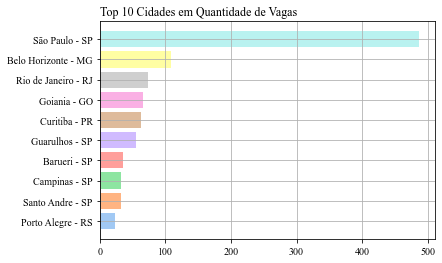

In [122]:
colors = sns.color_palette('pastel')
fig = plt.barh(dframe_jobs_by_cidade_top10['cidade'], dframe_jobs_by_cidade_top10['qtd_vagas'], color=colors)
plt.title('Top 10 Cidades em Quantidade de Vagas', loc='left')
plt.grid()
plt.show()

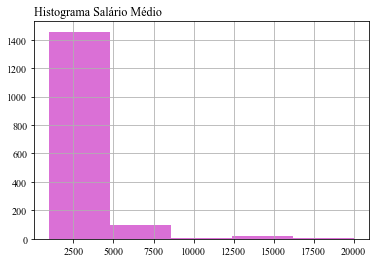

In [123]:
colors = sns.color_palette('pastel')
fig = plt.hist(dframe_jobs_cont['salario_vaga_processed_avg'], bins=5, color='orchid')
plt.title('Histograma Salário Médio', loc='left')
plt.grid()
plt.show()

In [136]:
dframe_jobs_by_categoria = dframe_jobs_cont.groupby(by=['titulo_vaga_processed_categoria'], as_index=False).agg({"titulo_vaga": np.count_nonzero,
                                                                                                                "salario_vaga_processed_avg":np.mean,
                                                                                                                "qty_total_tech_skills":np.mean})
dframe_jobs_by_categoria.columns = ['nivel_cargo','qtd_vagas','salario_medio','média_qtd_habilidades_tecnologia']
dframe_jobs_by_categoria['salario_medio'] = round(dframe_jobs_by_categoria['salario_medio'],0)
dframe_jobs_by_categoria['média_qtd_habilidades_tecnologia'] = round(dframe_jobs_by_categoria['média_qtd_habilidades_tecnologia'],2)

In [137]:
dframe_jobs_by_categoria

,nivel_cargo,qtd_vagas,salario_medio,média_qtd_habilidades_tecnologia
0,01 - estágio/assistente,848,1683.0,0.50
1,02 - analista júnior,496,2924.0,0.84
2,03 - analista pleno,41,3671.0,1.05
3,04 - analista sênior,76,5843.0,1.08
4,05 - coordenador/supervisor,66,5152.0,0.79
5,06 - especialista,10,6300.0,1.60
6,07 - gerente,21,7977.0,0.81
7,08 - CFO/controller,21,9762.0,0.67


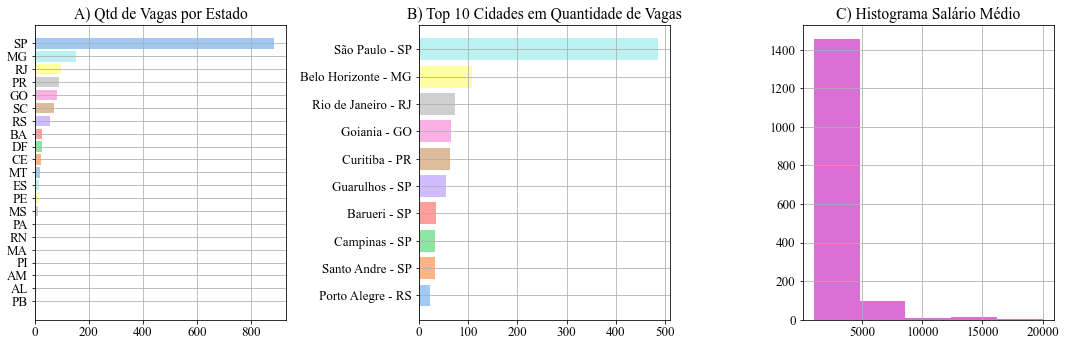

In [193]:
#Plotting all charts together
plt.rcParams.update({'font.size': 13})
colors = sns.color_palette('pastel')
fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5))
ax0.barh(dframe_jobs_by_estado['estado'], dframe_jobs_by_estado['qtd_vagas'], color=colors)
ax0.set_title('A) Qtd de Vagas por Estado')
ax1.barh(dframe_jobs_by_cidade_top10['cidade'], dframe_jobs_by_cidade_top10['qtd_vagas'], color=colors)
ax1.set_title('B) Top 10 Cidades em Quantidade de Vagas')
ax2.hist(dframe_jobs_cont['salario_vaga_processed_avg'], bins=5, color='orchid')
ax2.set_title('C) Histograma Salário Médio')

ax0.grid()
ax1.grid()
ax2.grid()
plt.tight_layout()
plt.savefig('Descriptive Charts_pt.png')
plt.show()